In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from ipywidgets import interact, Play
import time

# Generating Dataset

## constants

In [3]:
l = 1
c = 1
y0 = 1
pi = np.pi

## ```x``` and ```t``` vectors

In [4]:
x = np.linspace(0,l,200)
t = np.linspace(0,l,200)

## getting ```u(x,t)```

In [5]:
def get_wave(x,t):
    x_t_list = []
    list_of_lines = []
    for t_val in t:
        one_line = [] 
        # for storing values of u(x,t) for a particular t_val
        for x_val in x:
            A = (3*y0/4) * np.sin(pi*x_val/l) * np.cos(pi*c*t_val/l)
            B = (y0/4) * np.sin(3*pi*x_val/l) * np.cos(3*pi*c*t_val/l)
            one_line.append(A-B)
            x_t_list.append([x_val, t_val])
        # since all u(x,t) for particular t_val are computed
        # the list is appended
        list_of_lines.append(one_line)
    u = np.array(list_of_lines)
    x_t = np.array(x_t_list)
    return u, x_t

In [6]:
u, x_t = get_wave(x,t)
print(u.shape, x_t.shape)

(200, 200) (40000, 2)


In [7]:
u_new = u.reshape(-1,1)

print(f"u_new.shape = {u_new.shape}")
print(f"x_t.shape   = {x_t.shape}")

u_new.shape = (40000, 1)
x_t.shape   = (40000, 2)


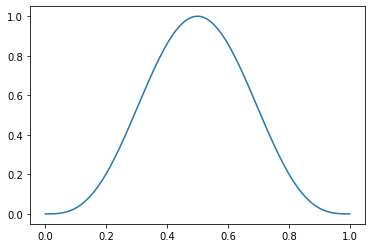

In [8]:
plt.plot(x,u[0])

## getting training data
template for training set for ```n``` number of samples

In [9]:
from random import randint

In [10]:
def get_training_data(samples):
    index = randint(0,40000-1)
    u_data = u_new[index]
    x_t_data = x_t[index]

    for i in range(1,samples):
        index = randint(0,40000-1)
        u_data = np.vstack((u_data, u_new[index]))
        x_t_data = np.vstack((x_t_data, x_t[index]))
    x_t_data.shape

In [11]:
index = randint(0,40000-1)
u_data = u_new[index]
x_t_data = x_t[index]

for i in range(1,500):
    index = randint(0,40000-1)
    u_data = np.vstack((u_data, u_new[index]))
    x_t_data = np.vstack((x_t_data, x_t[index]))
x_t_data.shape

(500, 2)

In [26]:
# useless mf
size = 5
u_data = u_new[0:100:size]
x_t_data = x_t[0:100:size]

for i in range(1,10):
    u_data   = np.concatenate((u_data, u_new[(i*100):(i*100+100):size]))
    x_t_data = np.concatenate((x_t_data, x_t[(i*100):(i*100+100):size]))

print(f"u_data.shape   = {u_data.shape}")
print(f"x_t_data.shape = {x_t_data.shape}")

u_data.shape   = (200, 1)
x_t_data.shape = (200, 2)


## getting testing data
```x_t_test_0[]``` contains input values where t_value = 0 (first 100 values)

In [12]:
x_t_test_0 = x_t[:100]

In [13]:
u[0].shape

(200,)

# setting time stamp variables

In [14]:
t1, t2 = 20, 180

In [15]:
t[t1]

0.10050251256281408

In [16]:
t[t2]

0.9045226130653267

# training set size = 100

In [68]:
index = randint(0,40000-1)
u_data = u_new[index]
x_t_data = x_t[index]

for i in range(1,100):
    index = randint(0,40000-1)
    u_data = np.vstack((u_data, u_new[index]))
    x_t_data = np.vstack((x_t_data, x_t[index]))
x_t_data.shape

(100, 2)

## for epochs = 500

In [69]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,
                       input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [70]:
epochs = 500

In [71]:
start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.2924076020717621
last loss  = 0.02746296487748623
time elapsed = 2.950 sec


100_500


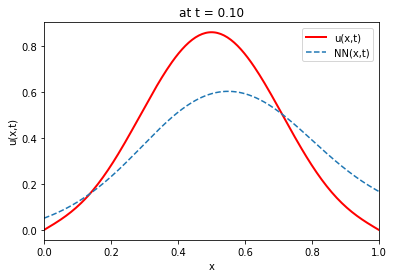

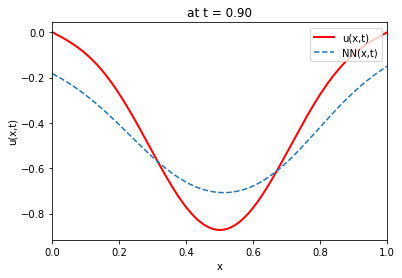

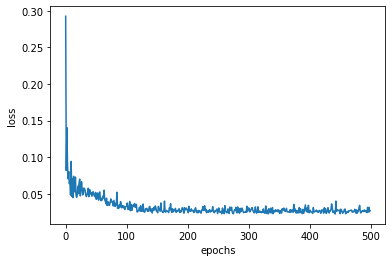

In [72]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');

print('100_500')

## for epochs = 1000

In [73]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [74]:
epochs = 1000

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.30161112546920776
last loss  = 0.027173001319169998
time elapsed = 5.805 sec


100_1000


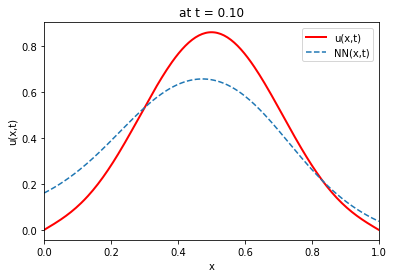

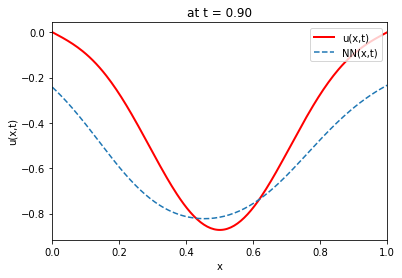

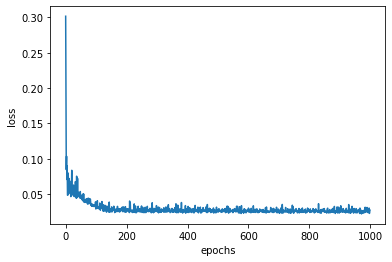

In [75]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('100_1000')

# training set size = 500

In [76]:
index = randint(0,40000-1)
u_data = u_new[index]
x_t_data = x_t[index]

for i in range(1,500):
    index = randint(0,40000-1)
    u_data = np.vstack((u_data, u_new[index]))
    x_t_data = np.vstack((x_t_data, x_t[index]))
x_t_data.shape

(500, 2)

## for epochs = 500

In [77]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [78]:
epochs = 500

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.11298374086618423
last loss  = 0.01601238176226616
time elapsed = 10.165 sec


500_500


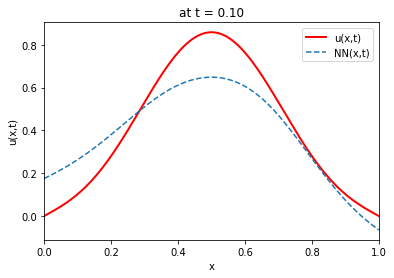

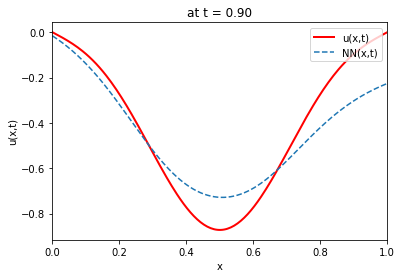

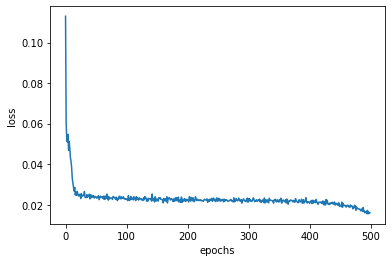

In [79]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('500_500')

## for epochs = 1000

In [80]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [81]:
epochs = 1000

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.17619384825229645
last loss  = 0.00245408876799047
time elapsed = 18.730 sec


500_1000


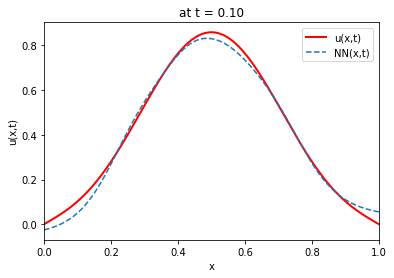

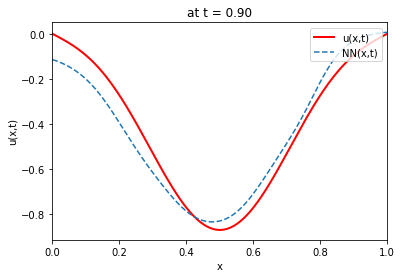

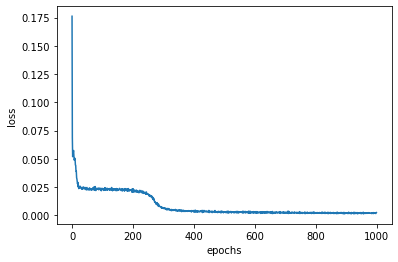

In [82]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('500_1000')

# training set size = 1000

In [83]:
index = randint(0,40000-1)
u_data = u_new[index]
x_t_data = x_t[index]

for i in range(1,1000):
    index = randint(0,40000-1)
    u_data = np.vstack((u_data, u_new[index]))
    x_t_data = np.vstack((x_t_data, x_t[index]))
x_t_data.shape

(1000, 2)

## for epochs = 500

In [84]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [85]:
epochs = 500

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.07691895961761475
last loss  = 0.0016502084909006953
time elapsed = 16.976 sec


1000_500


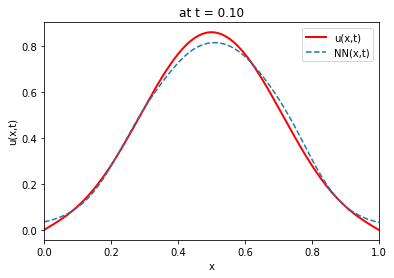

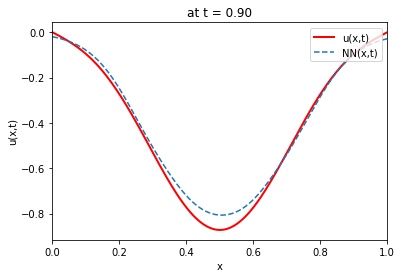

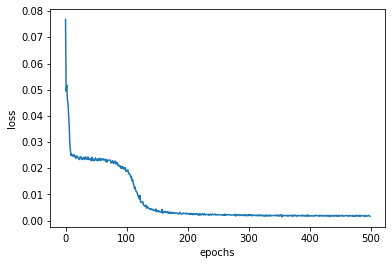

In [86]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('1000_500')

## for epochs = 1000

In [87]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [88]:
epochs = 1000

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.08013128489255905
last loss  = 0.0020541332196444273
time elapsed = 32.244 sec


1000_1000


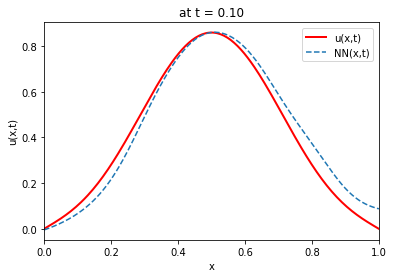

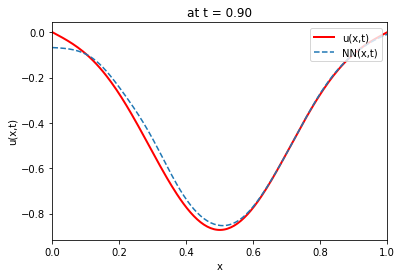

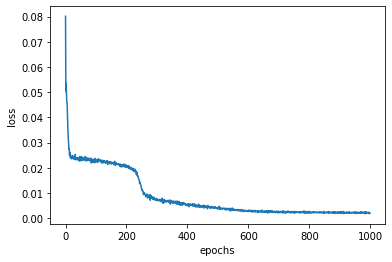

In [89]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('1000_1000')

# training set size = 5000

In [64]:
index = randint(0,40000-1)
u_data = u_new[index]
x_t_data = x_t[index]

for i in range(1,5000):
    index = randint(0,40000-1)
    u_data = np.vstack((u_data, u_new[index]))
    x_t_data = np.vstack((x_t_data, x_t[index]))
x_t_data.shape

(5000, 2)

## for epochs = 500

In [65]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [66]:
epochs = 500

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.06146632507443428
last loss  = 0.0014415625482797623
time elapsed = 81.049 sec


5000_500


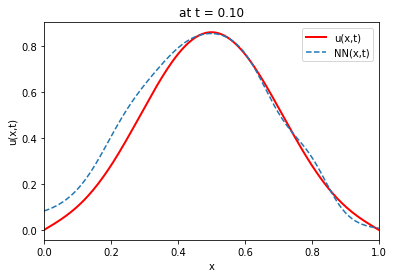

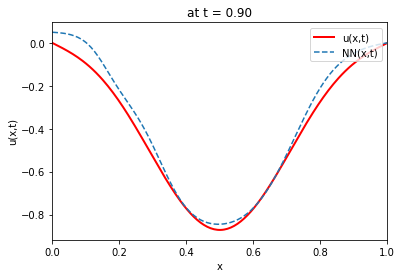

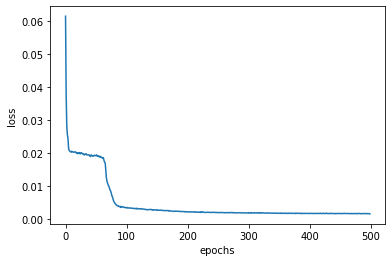

In [67]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('5000_500')

## for epochs = 1000

In [244]:
nodes = 20
NN = keras.Sequential([
    keras.layers.Dense(nodes,activation=keras.activations.tanh,input_shape=(2,)),
    keras.layers.Dense(nodes,activation=keras.activations.tanh),
    keras.layers.Dense(1,activation=keras.activations.tanh)
])

NN.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [245]:
epochs = 1000

start = time.time()
history = NN.fit(x_t_data, u_data, verbose=0, epochs=epochs)
elapsed = time.time() - start

print(f"first loss = {history.history['loss'][0]}")
print(f"last loss  = {history.history['loss'][-1]}")
print(f"time elapsed = {elapsed:.3f} sec")

first loss = 0.056080687791109085
last loss  = 0.0015744281699880958
time elapsed = 135.287 sec


5000_1000


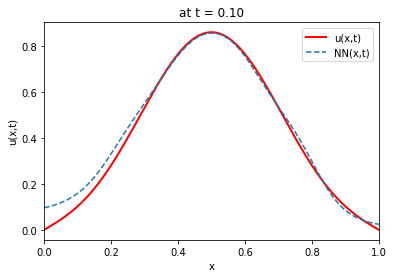

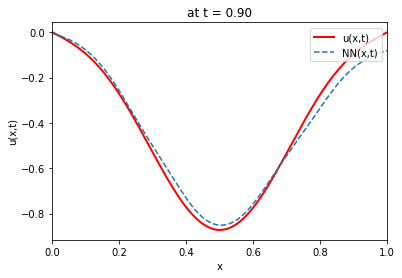

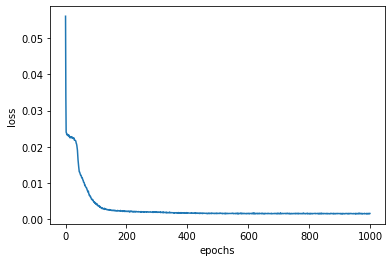

In [246]:
plt.figure(1)
plot_wave(t1)

plt.figure(2)
plot_wave(t2)

plt.figure(3)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');
print('5000_1000')

# loss results

In [96]:
loss_val = np.array([
    [0.017917757853865623,  0.0075185103341937065],
    [0.002006066031754017,  0.002667334396392107],
    [0.0021702339872717857, 0.0018202521605417132],
    [0.001361890695989132,  0.0015744281699880958]
])

In [97]:
loss_500, loss_1000 = np.split(loss_val, 2, axis=1)

## mean loss for 500 epochs

In [98]:
np.mean(loss_500)

0.0058639871422201395

## mean loss for 1000 epochs

In [99]:
np.mean(loss_1000)

0.0033951312652789056

## mean loss for each training set

In [100]:
for i in range(loss_val.shape[0]):
    print(np.mean(loss_val[i]))

0.012718134094029665
0.002336700214073062
0.0019952430739067495
0.0014681594329886138


## mean loss

In [101]:
np.mean(loss_val)

0.004629559203749523

## least loss

In [102]:
print(np.argmin(loss_val), '\t', np.min(loss_val))

6 	 0.001361890695989132


In [103]:
1.36e-03

0.00136

## time taken

In [104]:
time_taken = np.array([
    [3.136, 6.500],
    [9.821, 18.659],
    [17.696, 30.323],
    [73.918, 135.287]
])

# new losses

In [91]:
new_loss_val = np.array([
    [0.02746296487748623,  0.027173001319169998],
    [0.01601238176226616,  0.00245408876799047],
    [0.0016502084909006953, 0.0020541332196444273],
    [0.0014415625482797623,  0.0015744281699880958]
])

new_time_taken = np.array([
    [2.950, 5.805],
    [10.165, 18.730],
    [16.976, 32.244],
    [81.049, 135.287]
])

In [92]:
for i in range(new_loss_val.shape[0]):
    print(np.mean(new_loss_val[i]))

0.027317983098328114
0.009233235265128314
0.0018521708552725613
0.001507995359133929


In [94]:
np.mean(loss_val)

0.00997784614446573

In [95]:
print(np.argmin(loss_val), '\t', np.min(loss_val))

6 	 0.0014415625482797623


# plot function

In [26]:
def plot_wave(t_index):
    plt.plot(x,u[t_index], color='red', linewidth=2)
    plt.plot(x,NN(x_t[200*t_index:200+(200*t_index)]), '--')
    plt.xlim(0,1)
#     plt.ylim(-1.15,1.15)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t)')
    plt.legend([f'u(x,t)', f'NN(x,t)'], loc=(0.77,0.82))
    plt.title(f'at t = {t[t_index]:.2f}')

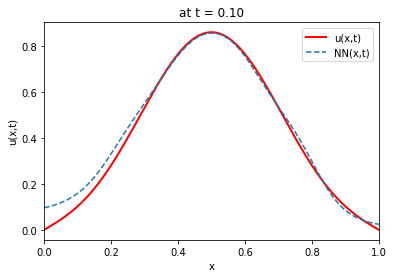

In [201]:
plot_wave(20)

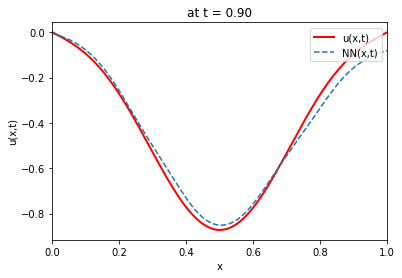

In [213]:
plot_wave(180)

In [197]:
interact(plot_wave, t_index=(0,t.shape[0]-1,1));
# interact(plot_wave, t_index=Play(min=0,max=t.shape[0]-1, step=2));

interactive(children=(IntSlider(value=99, description='t_index', max=199), Output()), _dom_classes=('widget-in…